In [3]:
import matplotlib.pyplot as plt

def read_log(filename, verbose=False):
    if verbose:
        print('Filename:', filename)
    with open(filename, 'r') as f:
        lines = f.readlines()
    iterations = []
    penalties = []
    objectives = []
    fs = []
    
    for i in range(len(lines)):
        if 'Iteration' in lines[i]:
            iterations.append(int(lines[i].split()[2]))
            penalties.append(float(lines[i+1].split()[2]))
            objectives.append(float(lines[i+2].split()[2]))
            fs.append(float(lines[i+3].split()[2]))
            if verbose:
                print('Iteration {:6d}: Penalty: {:.6f}, Objective: {:.6f}, F = {:.8f}'.format(iterations[-1], penalties[-1], objectives[-1], fs[-1]))

    return iterations, penalties, objectives, fs

def plot_log(x, y1, y2, title, x_label, y1_label, y2_label, y1_color='blue', y2_color='red'):

    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.set_xlabel(x_label)
    ax1.plot(x, y1, color=y1_color, linewidth=2)
    ax1.set_ylabel(y1_label, color=y1_color)
    ax1.tick_params(axis='y', labelcolor=y1_color)
    ax1.grid(alpha=0.2, axis='y', color=y1_color)
    
    ax2 = ax1.twinx()
    ax2.plot(x, y2, color=y2_color, linewidth=2)
    ax2.set_ylabel(y2_label, color=y2_color)
    ax2.tick_params(axis='y', labelcolor=y2_color)
    ax2.grid(alpha=0.2, axis='y', color=y2_color)

    plt.title(filename)
    plt.show()

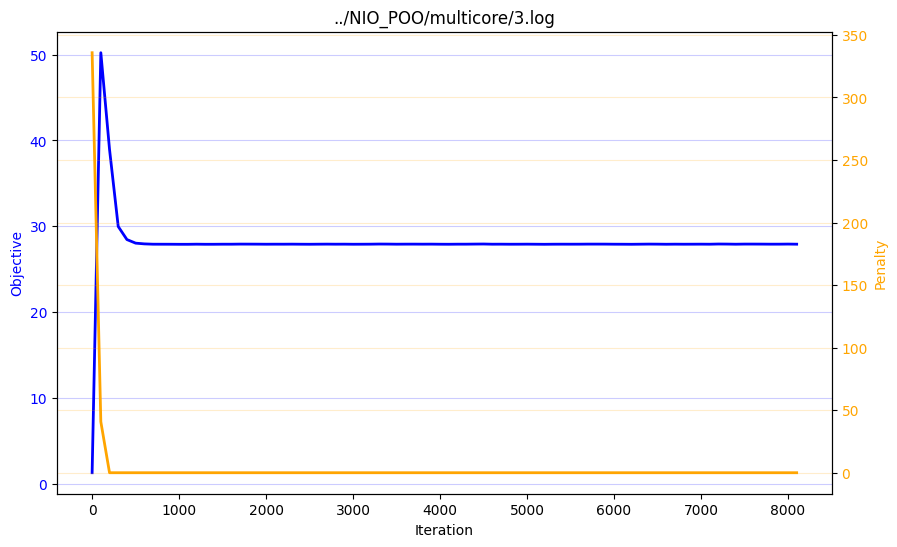

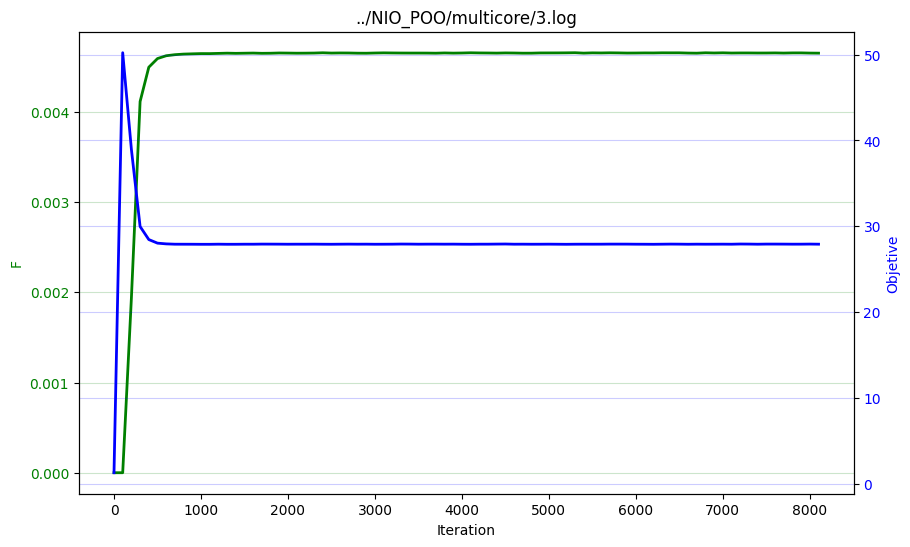

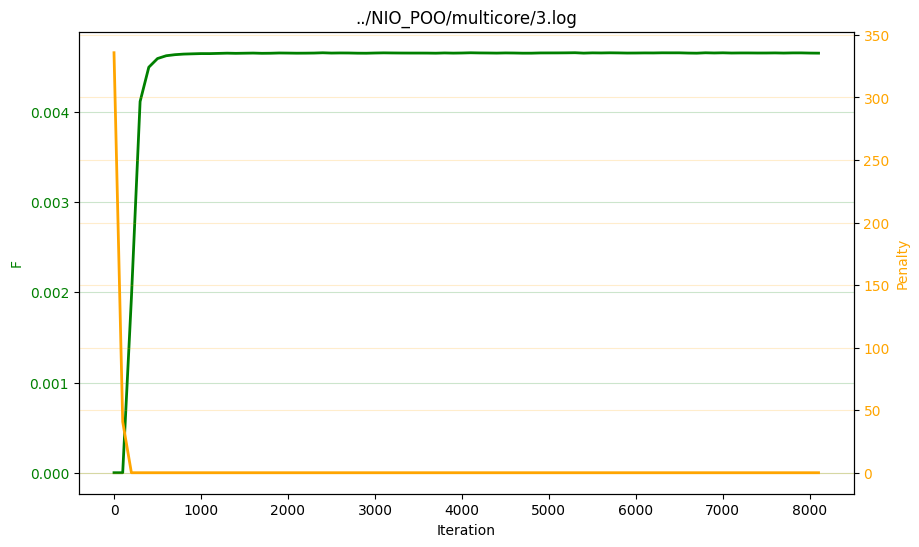

In [4]:
# filename = '../gradient/multicore_nio/3.log'
filename = '../NIO_POO/multicore/3.log'
# filename = '../NIO_POO/Adam_log/3_09.log'
iterations, penalties, objectives, fs = read_log(filename)

start = 0
end = 800
iterations = iterations[start:end]
penalties = penalties[start:end]
objectives = objectives[start:end]
fs = fs[start:end]

plot_log(iterations, objectives, penalties, filename, "Iteration", "Objective", "Penalty", 'blue', 'orange')
plot_log(iterations, fs, objectives, filename, "Iteration", "F", "Objetive", 'green', 'blue')
plot_log(iterations, fs, penalties, filename, "Iteration", "F", "Penalty", 'green', 'orange')

In [ ]:
# filename = '../gradient/multicore_nio/3.log'
filename = '../NIO_POO/Adam_log/3.log'
iterations, penalties, objectives, fs = read_log(filename)

start = 0
end = 120
iterations = iterations[start:end]
penalties = penalties[start:end]
objectives = objectives[start:end]
fs = fs[start:end]

plot_log(iterations, objectives, penalties, filename, "Iteration", "Objective", "Penalty", 'blue', 'orange')
plot_log(iterations, fs, objectives, filename, "Iteration", "F", "Objetive", 'green', 'blue')
plot_log(iterations, fs, penalties, filename, "Iteration", "F", "Penalty", 'green', 'orange')